In [3]:
import pandas as pd

file_path = "infolimpioavanzadoTarget.csv"
df = pd.read_csv('/content/infolimpioavanzadoTarget.csv')

print("First rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())


First rows of the dataset:
         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN   


Missing Values:
date               0
open               0
high               0
low                0
close              0
                  ..
volumenrelativo    0
diff               0
INCREMENTO         0
TARGET             0
Date               0
Length: 1286, dtype: int64


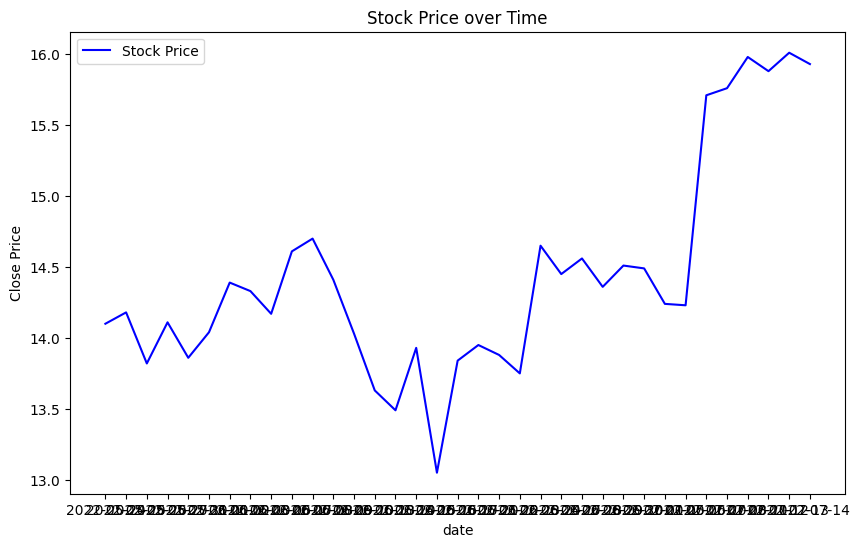

In [7]:
import matplotlib.pyplot as plt

print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna()

df['Date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], color='blue', label='Stock Price')
plt.title("Stock Price over Time")
plt.xlabel("date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = ['open', 'high', 'low', 'volume']
target = 'close'

X = df[features]
y = df[target]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")



Mean Absolute Error: 0.15574231368983224
Mean Squared Error: 0.044448381046866506


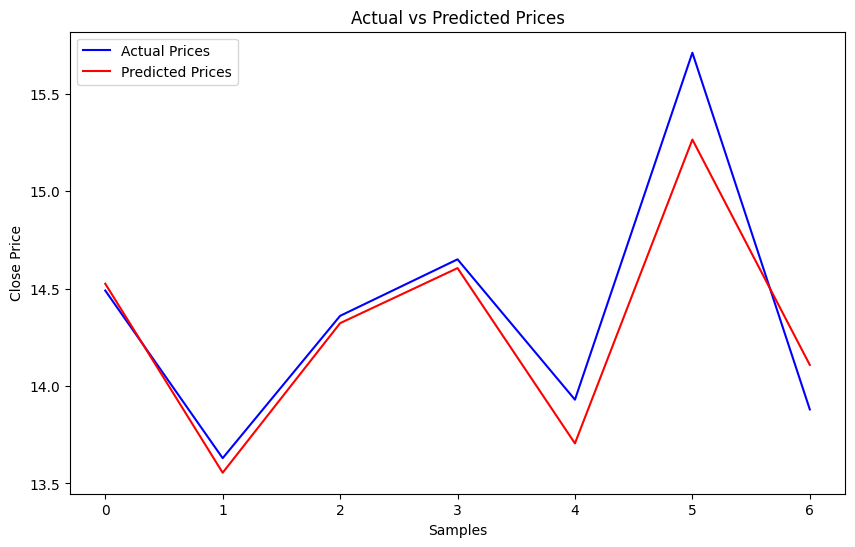

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Prices')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Samples")
plt.ylabel("Close Price")
plt.legend()
plt.show()
